In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pakaian_pria_shopee_sales_cleaning.csv')

In [3]:
df.head()

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
0,Star+[PROMO] KAOS POLOS LENGAN PENDEK COTTON C...,Atasan,kaos,jakarta utara,27800.0,10000,4.9,90600,tokyo_urban_style,18,5,74600
1,Star+KAOS POLOS LENGAN PENDEK COTTON COMBED 30S,Atasan,kaos,bandung,23900.0,10000,4.8,71800,yoonacollection24,36,21,58600
2,StarKaos Polos Cotton Combed 30s Distro Grosir...,Atasan,kaos,bandung,23900.0,10000,4.7,80000,kaospedia,36,39,105700
3,Star[LANGSUNG DARI PABRIK] [HARGA RESELLER] Ka...,Atasan,kaos,bandung,27000.0,10000,4.9,43200,galerykaospolos,48,185,117000
4,Star+[LANGSUNG DARI PABRIK] Kaos Polos cotton ...,Atasan,kaos,jakarta utara,30800.0,10000,4.9,69900,redtomatoes,24,14,111300


In [4]:
df.describe()

,harga_rata2,terjual,rating,jumlah_review,umur_bulan_toko,n_produk_toko,pengikut_toko
count,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2.378000e+03
mean,48320.622582,5811.851976,4.728553,3564.971405,32.365013,332.134146,1.691692e+05
std,39710.241741,3508.797939,0.137731,6307.500471,34.353266,601.339276,5.028946e+05
min,99.000000,368.000000,3.500000,1.000000,2.000000,3.000000,0.000000e+00
25%,23399.625000,2500.000000,4.700000,718.250000,17.000000,46.000000,4.300000e+03
50%,36638.750000,5400.000000,4.700000,1600.000000,30.000000,115.000000,1.565000e+04
75%,61875.000000,10000.000000,4.800000,3700.000000,48.000000,274.750000,5.845000e+04
max,600075.000000,10000.000000,5.000000,90600.000000,696.000000,11800.000000,2.300000e+06


what is the most sales in sub-category market?
What is the suitable sub-category market for newcomers in Shopee Indonesia?

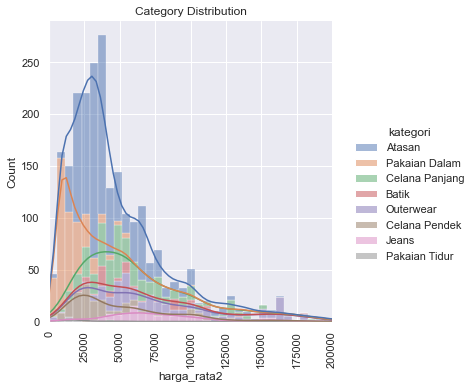

In [51]:
sns.displot(df, x='harga_rata2', hue='kategori', multiple="stack", kde=True)
plt.xlim(0, 200000)
plt.xticks(rotation=90)
plt.title('Category Distribution')
sns.set()

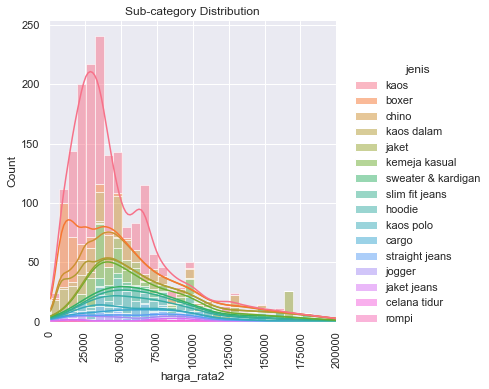

In [55]:
sns.displot(df, x='harga_rata2', hue='jenis', multiple="stack", kde=True)
plt.xlim(0, 200000)
plt.xticks(rotation=90)
plt.title('Sub-category Distribution')
sns.set()

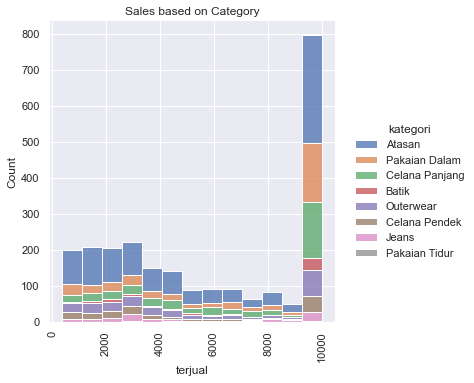

In [53]:
sns.displot(df, x='terjual', hue='kategori', multiple="stack")
plt.xticks(rotation=90)
plt.title('Sales based on Category')
sns.set()

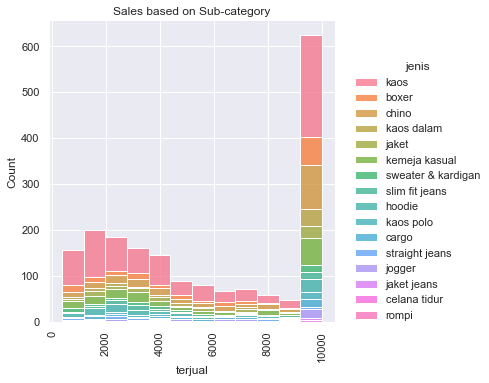

In [56]:
sns.displot(df, x='terjual', hue='jenis', multiple="stack")
plt.xticks(rotation=90)
plt.title('Sales based on Sub-category')
sns.set()

based on the data distribution and sales plot, atasan(top) with kaos(t-shirt), pakaian dalam(underclothes) with boxer, and celana panjang(trouser) with chino are the top 3 sales in Shopee Indonesia market. For further analysis, I identify every sub-category in the existing market

In [60]:
df[df['jenis'] == 'kaos'].groupby(['toko'])['nama'].count().sort_values(ascending=False).head(10)

toko
erigostore           64
gns_collection       28
kaosdantas.import    15
asy168               14
fairgoods            14
ark_shop99           12
indomarket999        11
tompelaje            10
simonsimonchia        7
dionjeans             7
Name: nama, dtype: int64

In [61]:
df[df['jenis'] == 'kaos'].groupby(['lokasi'])['nama'].count().sort_values(ascending=False).head(10)

lokasi
jakarta barat         218
bandung               156
tangerang              99
cimahi                 53
surabaya               27
jakarta utara          27
magelang               16
tangerang selatan      14
semarang               12
jakarta pusat          11
Name: nama, dtype: int64

In [62]:
df[df['jenis'] == 'boxer'].groupby(['toko'])['nama'].count().sort_values(ascending=False).head(10)

toko
surfinclo.id         6
distrobm             5
ss_fashion           4
ciaraofficialshop    4
vayamadelon          3
komandanbatik        3
wimigrosir           3
ayumicollection.     3
mbakdiva             2
dollietories         2
Name: nama, dtype: int64

In [63]:
df[df['jenis'] == 'boxer'].groupby(['lokasi'])['nama'].count().sort_values(ascending=False).head(10)

lokasi
jakarta barat        30
bandung              23
pekalongan           14
jakarta utara        14
tangerang            11
surakarta (solo)      6
bogor                 5
klaten                5
bekasi                4
jakarta pusat         4
Name: nama, dtype: int64

In [64]:
df[df['jenis'] == 'chino'].groupby(['toko'])['nama'].count().sort_values(ascending=False).head(10)

toko
erigostore            9
thufail05             7
arj88store            7
pieter.pieter         5
firzanfashion         4
cixstore              4
molrakyat             4
djakastore            4
zafik_store           4
rhimfashion_wanita    4
Name: nama, dtype: int64

In [65]:
df[df['jenis'] == 'chino'].groupby(['lokasi'])['nama'].count().sort_values(ascending=False).head(10)

lokasi
pekalongan        97
bandung           18
kudus             17
tangerang         13
jepara            13
denpasar           8
pemalang           7
bekasi             7
jakarta barat      6
semarang           5
Name: nama, dtype: int64

In [72]:
df[df['toko'] == 'erigostore'].head(3)

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
10,Erigo Chino Pants Sirius Black,Celana Panjang,chino,tangerang,128000.0,10000,4.8,79500,erigostore,48,2200,2300000
70,Erigo T-Shirt Project Summer Black,Atasan,kaos,tangerang,65000.0,10000,4.9,32900,erigostore,48,2200,2300000
79,Erigo Chino Pants Paul Light Grey,Celana Panjang,chino,tangerang,128000.0,10000,4.8,20900,erigostore,48,2200,2300000


In [71]:
df[df['toko'] == 'surfinclo.id'].head(3)

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
95,StarSURFINCLO Boxer Polos Cotton Combed 30s & ...,Pakaian Dalam,boxer,bandung,40000.0,10000,4.7,4800,surfinclo.id,28,317,185200
430,StarBEST SELLER!!! 12.12 - SURFINCLO CELANA BO...,Celana Pendek,NaN,bandung,31250.0,10000,4.7,15500,surfinclo.id,28,317,185200
538,StarSPECTA BOXER RADER 211W AUTHENTIC+ | BOXER...,Pakaian Dalam,boxer,bandung,41250.0,10000,4.6,8800,surfinclo.id,28,317,185300


In [74]:
df[df['toko'] == 'distrobm'].head(3)

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
8,BEST SELLER - BOXER PRIA I BOXER WANITA I CELA...,Pakaian Dalam,boxer,bandung,18200.0,10000,4.7,21300,distrobm,48,211,49600
308,BOXER DISTRO !! - I CELANA PENDEK I CELANA KOL...,Pakaian Dalam,boxer,bandung,18750.0,10000,4.8,6800,distrobm,48,211,49600
394,BOXER SALUR - BEST SELLER 12.12 - | CELANA DAL...,Pakaian Dalam,boxer,bandung,18750.0,10000,4.8,5400,distrobm,48,211,49600


In [75]:
df[df['toko'] == 'ss_fashion'].head(3)

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
23,celana dalam pria CD pria lokal,Pakaian Dalam,NaN,jakarta barat,3145.0,10000,4.5,4200,ss_fashion,48,450,621100
42,boxer munafie pria import new stripes kode: 8027,Pakaian Dalam,boxer,jakarta barat,8800.0,10000,4.8,2500,ss_fashion,48,450,621100
56,COD celana dalam pria import CD munafie fashio...,Pakaian Dalam,NaN,jakarta barat,8740.0,10000,4.8,3400,ss_fashion,48,450,621100


the Boxer is the least competition in the market. with the relatively small price, its suitable for newcomers to open online 
store in the boxer market. while tshirt and chino market are dominated by big store like erigostore with 2.3M follower, which is very popular and also the capital or money you need to get in into the market will be bigger than boxer market for newcomers.

The most popular sub-category in Shopee Indonesia market are kaos(t-shirt), boxer, and chino as top 3 product in the market. these 3 products could be the niche for marketing research for newcomers in another e-commerce market, if the immigration happen from Shopee to another platform.

what is the most effective store?

In [88]:
df.head(3)

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
0,Star+[PROMO] KAOS POLOS LENGAN PENDEK COTTON C...,Atasan,kaos,jakarta utara,27800.0,10000,4.9,90600,tokyo_urban_style,18,5,74600
1,Star+KAOS POLOS LENGAN PENDEK COTTON COMBED 30S,Atasan,kaos,bandung,23900.0,10000,4.8,71800,yoonacollection24,36,21,58600
2,StarKaos Polos Cotton Combed 30s Distro Grosir...,Atasan,kaos,bandung,23900.0,10000,4.7,80000,kaospedia,36,39,105700


In [97]:
df[df.umur_bulan_toko <= 3].sort_values(by=['terjual'], ascending=False).head()

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
705,Star[Bisa COD] Celana Pendek Pria Cowok Dewasa...,Celana Pendek,NaN,pekalongan,25799.5,10000,4.6,347,d3wisri,2,40,1800
964,Star(BISA COD) Celana Kerja Pria / Celana Baha...,Celana Panjang,NaN,pekalongan,57899.5,10000,4.6,454,_pacolgowang,2,15,1300
96,Star+KAOS POLOS OVERSIZE UNISEX COTTON COMBED ...,Atasan,kaos,bandung,64480.0,9400,4.9,3600,qrproject.id,3,7,13200
1964,Star[Bisa COD Promo 12:12] Celana Panjang Pri...,Celana Panjang,chino,pekalongan,45000.0,5600,4.6,376,sneber_store,2,17,1600
2229,StarBaju Kemeja Pria / Kemeja Lengan Panjang /...,Atasan,kemeja kasual,pekalongan,44300.0,4700,4.7,218,a.l_store01,2,18,358


In [84]:
df[df.umur_bulan_toko <= 3].sort_values(by=['pengikut_toko'], ascending=False).head()

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
96,Star+KAOS POLOS OVERSIZE UNISEX COTTON COMBED ...,Atasan,kaos,bandung,64480.0,9400,4.9,3600,qrproject.id,3,7,13200
2270,Just Do Eat,Atasan,kaos,tangerang,120000.0,1300,4.9,675,nexcolony,3,5,3000
1264,StarKemeja Flanel Import Pria Wanita Distro Fl...,Atasan,kemeja kasual,pemalang,47500.0,2900,4.7,351,salsabilah_stor,3,15,2000
1948,SETELAN STELAN JAS BLAZER BLEZER NIKAH KOREA N...,Outerwear,NaN,tasikmalaya,365000.0,1200,5.0,20,fathershop.official,2,47,2000
1949,CELANA JOGER JOGGER TRAINING SANTAI KARET HYPE...,Celana Panjang,jogger,tasikmalaya,64400.0,2100,5.0,20,fathershop.official,2,47,2000


In [93]:
df[df.umur_bulan_toko <= 3].sort_values(by=['terjual'], ascending=False).sort_values(by=['pengikut_toko'], ascending=False).head()

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
96,Star+KAOS POLOS OVERSIZE UNISEX COTTON COMBED ...,Atasan,kaos,bandung,64480.0,9400,4.9,3600,qrproject.id,3,7,13200
2270,Just Do Eat,Atasan,kaos,tangerang,120000.0,1300,4.9,675,nexcolony,3,5,3000
1949,CELANA JOGER JOGGER TRAINING SANTAI KARET HYPE...,Celana Panjang,jogger,tasikmalaya,64400.0,2100,5.0,20,fathershop.official,2,47,2000
1264,StarKemeja Flanel Import Pria Wanita Distro Fl...,Atasan,kemeja kasual,pemalang,47500.0,2900,4.7,351,salsabilah_stor,3,15,2000
2185,CELANA FORMAL BAHAN KERJA KANTOR PRIA SLIM FIT...,Celana Panjang,NaN,tasikmalaya,149000.0,876,5.0,19,fathershop.official,2,47,2000


In [103]:
df[df.umur_bulan_toko <= 6].sort_values(by=['terjual'], ascending=False).sort_values(by=['pengikut_toko'], ascending=False).head(10)

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
1631,Star+Celana Dalam Pria Munafie BOXER MAN UNDER...,Pakaian Dalam,boxer,jakarta utara,11900.0,698,4.8,169,sexy.crowd,5,71,21800
101,Star+Baru CD Munafie Celana Dalam Boxer Munafi...,Pakaian Dalam,boxer,jakarta utara,9025.0,6700,4.9,1100,sexy.crowd,5,71,21700
841,"Kemeja Flanel Impor Pria Wanita Casual Distro,...",Atasan,kemeja kasual,pemalang,48000.0,8200,4.8,1500,erwinstore123,6,41,14800
96,Star+KAOS POLOS OVERSIZE UNISEX COTTON COMBED ...,Atasan,kaos,bandung,64480.0,9400,4.9,3600,qrproject.id,3,7,13200
354,StarKemeja Flanel Impor Pria Wanita Distro Fla...,Atasan,kemeja kasual,pemalang,47600.0,9600,4.7,1600,anfashion11,5,29,11200
1178,✨WINGALERY✨ Celana Dalam Boxer Pria Munafie Cd...,Pakaian Dalam,NaN,jakarta utara,9038.0,3200,4.8,329,wingalery,6,140,8600
1268,✨WINGALERY✨ Celana Dalam Pria/MUNAFIE UNDERWE...,Pakaian Dalam,NaN,jakarta utara,8820.0,1100,4.9,158,wingalery,6,140,8600
1167,✨WINGALERY✨CELANA DALAM MUNAFIE PRIA CELANA DA...,Pakaian Dalam,NaN,jakarta utara,8989.0,3300,4.9,348,wingalery,6,140,8600
365,Star[COD] Eighty Nine Crewneck Black Motif Sim...,Outerwear,sweater & kardigan,bandung,85000.0,5500,4.7,2800,zerofourofficial,5,78,7600
1554,StarCelana jeans pria panjang slim fit skiny l...,Jeans,slim fit jeans,pekalongan,41000.0,3100,4.8,954,mrr_denim,5,14,6100


In [99]:
df[df['toko'] == 'qrproject.id']

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
96,Star+KAOS POLOS OVERSIZE UNISEX COTTON COMBED ...,Atasan,kaos,bandung,64480.0,9400,4.9,3600,qrproject.id,3,7,13200


In [100]:
df[df['toko'] == 'sexy.crowd']

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
101,Star+Baru CD Munafie Celana Dalam Boxer Munafi...,Pakaian Dalam,boxer,jakarta utara,9025.0,6700,4.9,1100,sexy.crowd,5,71,21700
1631,Star+Celana Dalam Pria Munafie BOXER MAN UNDER...,Pakaian Dalam,boxer,jakarta utara,11900.0,698,4.8,169,sexy.crowd,5,71,21800


the most effective store is qrproject.id within 3 months they can have 13200 followers with 9600 sales in tshirt market, in the boxer market sexy.crowd is one of the best with 21700 follower. The newcomers can spectating their store page and also their social media. anfashion11 and erwinstore123 also can be another alternative to learn from spectating.

What is the most popular store and what products are they sell?

In [75]:
df.head()

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
0,Star+[PROMO] KAOS POLOS LENGAN PENDEK COTTON C...,Atasan,kaos,jakarta utara,27800.0,10000,4.9,90600,tokyo_urban_style,18,5,74600
1,Star+KAOS POLOS LENGAN PENDEK COTTON COMBED 30S,Atasan,kaos,bandung,23900.0,10000,4.8,71800,yoonacollection24,36,21,58600
2,StarKaos Polos Cotton Combed 30s Distro Grosir...,Atasan,kaos,bandung,23900.0,10000,4.7,80000,kaospedia,36,39,105700
3,Star[LANGSUNG DARI PABRIK] [HARGA RESELLER] Ka...,Atasan,kaos,bandung,27000.0,10000,4.9,43200,galerykaospolos,48,185,117000
4,Star+[LANGSUNG DARI PABRIK] Kaos Polos cotton ...,Atasan,kaos,jakarta utara,30800.0,10000,4.9,69900,redtomatoes,24,14,111300


In [103]:
top = df[df['terjual'] == 10000]
top2 = top[top['pengikut_toko'] >= 1000000]
top2.groupby(['toko'])['nama'].count()

toko
erigostore              20
supplierhijabfashion     8
fygalery                 2
aceboutique              1
Name: nama, dtype: int64

In [119]:
top2[top2['toko'] == 'erigostore'].groupby(['kategori','jenis'])['nama'].count().sort_values(ascending=False)

kategori        jenis             
Celana Panjang  chino                 9
Outerwear       jaket                 5
Atasan          kaos                  5
Outerwear       sweater & kardigan    1
Name: nama, dtype: int64

In [120]:
top2[top2['toko'] == 'supplierhijabfashion'].groupby(['kategori','jenis'])['nama'].count().sort_values(ascending=False)

kategori       jenis     
Pakaian Dalam  boxer         2
Atasan         kaos          2
Pakaian Dalam  kaos dalam    1
Name: nama, dtype: int64

In [124]:
top2[top2['toko'] == 'fygalery'].groupby(['kategori', 'jenis'])['nama'].count().sort_values(ascending=False)

kategori       jenis
Pakaian Dalam  boxer    1
Name: nama, dtype: int64

In [115]:
top2[top2['toko'] == 'aceboutique'].groupby(['kategori'])['nama'].count().sort_values(ascending=False)

kategori
Pakaian Dalam    1
Name: nama, dtype: int64

The most popular store with sales over 10k and follower over 1M are erigostore with chino market as their top market and the other store in underclothes market are supplierhijabfashion, fygalery and aceboutique

looking for Some Fun Fact

In [135]:
df.head()

,nama,kategori,jenis,lokasi,harga_rata2,terjual,rating,jumlah_review,toko,umur_bulan_toko,n_produk_toko,pengikut_toko
0,Star+[PROMO] KAOS POLOS LENGAN PENDEK COTTON C...,Atasan,kaos,jakarta utara,27800.0,10000,4.9,90600,tokyo_urban_style,18,5,74600
1,Star+KAOS POLOS LENGAN PENDEK COTTON COMBED 30S,Atasan,kaos,bandung,23900.0,10000,4.8,71800,yoonacollection24,36,21,58600
2,StarKaos Polos Cotton Combed 30s Distro Grosir...,Atasan,kaos,bandung,23900.0,10000,4.7,80000,kaospedia,36,39,105700
3,Star[LANGSUNG DARI PABRIK] [HARGA RESELLER] Ka...,Atasan,kaos,bandung,27000.0,10000,4.9,43200,galerykaospolos,48,185,117000
4,Star+[LANGSUNG DARI PABRIK] Kaos Polos cotton ...,Atasan,kaos,jakarta utara,30800.0,10000,4.9,69900,redtomatoes,24,14,111300


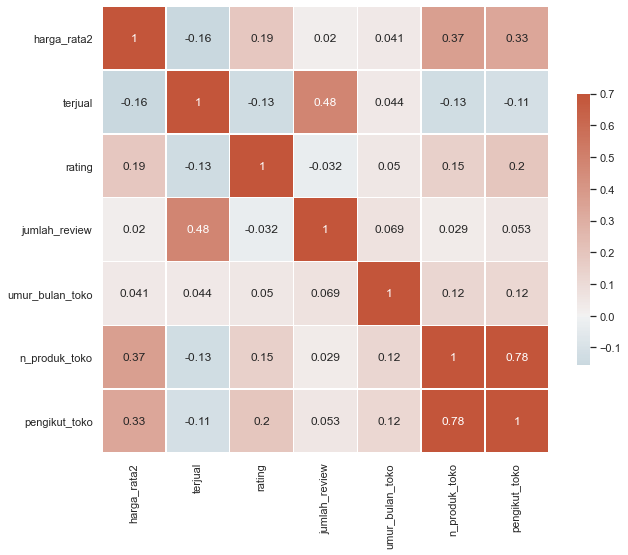

In [12]:
plt.figure(figsize =(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['harga_rata2', 'terjual','rating','jumlah_review','umur_bulan_toko','n_produk_toko', 'pengikut_toko']].corr(),cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
sns.set()

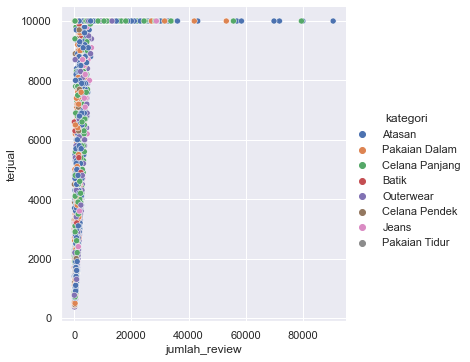

In [140]:
sns.relplot(data=df, x='jumlah_review', y='terjual', hue='kategori')
sns.set()

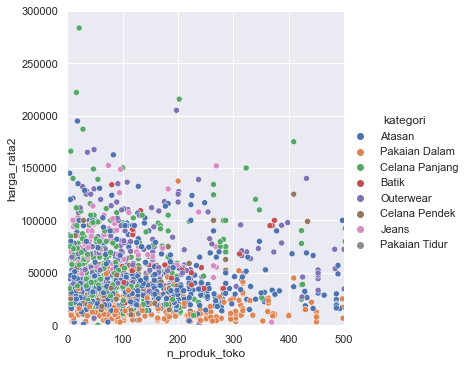

In [148]:
sns.relplot(data=df, x='n_produk_toko', y='harga_rata2', hue='kategori')
plt.xlim(0,500)
plt.ylim(0,300000)
sns.set()

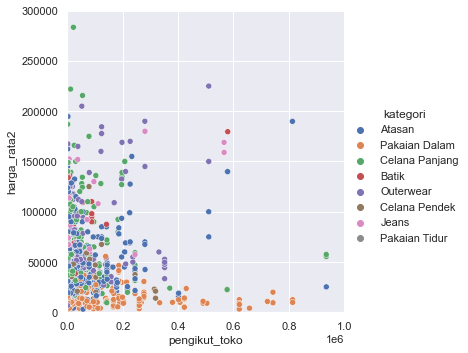

In [149]:
sns.relplot(data=df, x='pengikut_toko', y='harga_rata2', hue='kategori')
plt.xlim(0,1000000)
plt.ylim(0,300000)
sns.set()

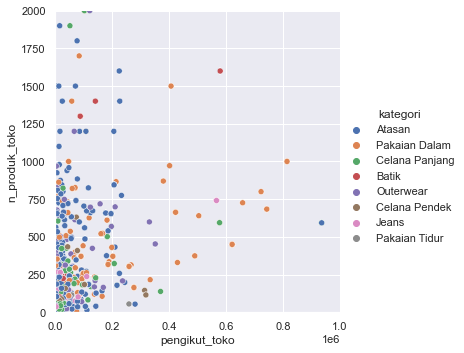

In [150]:
sns.relplot(data=df, x='pengikut_toko', y='n_produk_toko', hue='kategori')
plt.xlim(0,1000000)
plt.ylim(0,2000)
sns.set()

not a lot of information that I can extract from correlation table, just one thing is obvious which is incresing jumlah_review(number of reviews) will also increase the terjual(sales).